# pytorch

In [1]:
import torch

torch.__version__

print(torch.cuda.is_available(), torch.cuda.device_count(), torch.cuda.current_device())
print(torch.cuda.device(0), torch.cuda.get_device_name(0))

True 1 0
<torch.cuda.device object at 0x76e3e9462610> NVIDIA GeForce RTX 4070


In [2]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [3]:
x.numel()

12

In [4]:
x.shape

torch.Size([12])

In [5]:
X = x.reshape(3, 4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [6]:
a = torch.zeros((2, 3, 4))
print(a.shape)
a

torch.Size([2, 3, 4])


tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [7]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [8]:
#  standard Gaussian (normal) distribution with mean 0 and standard deviation 1
torch.randn(3, 4)

tensor([[-3.2851e-01,  1.4054e+00,  9.0113e-04, -7.6992e-01],
        [-6.2352e-02, -7.8366e-01,  6.0969e-01,  2.2960e+00],
        [-4.2760e-01,  1.0454e+00,  8.7644e-01,  4.4881e-01]])

In [9]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

# Indexing and Slicing

In [10]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [11]:
X[-1], X[1:3]
# last row, row 1,2 (1:3)

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [12]:
X[1, 2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [13]:
X[:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

# Operations

In [14]:
torch.exp(x)

tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])

In [15]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
# elementwise
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [16]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [17]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [18]:
X.sum()

tensor(66.)

# Broadcasting

In [19]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [20]:
# Since a and b are 3x1 and 1x2  matrices, respectively, their shapes do not match up. Broadcasting produces a larger 
# 3x2 matrix by replicating matrix a along the columns and matrix b along the rows before adding them elementwise.
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

# Saving Memory

In [21]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [22]:
''' 
performing in-place operations is easy. 
We can assign the result of an operation to a previously allocated array Y by using slice notation: Y[:] = <expression>. 
'''
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 130721243381824
id(Z): 130721243381824


In [23]:
'''
If the value of X is not reused in subsequent computations, 
we can also use X[:] = X + Y or X += Y to reduce the memory overhead of the operation.
'''
before = id(X)
X += Y
id(X) == before

True

# Conversion to Other Python Objects

In [24]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [25]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

# Exercises
Run the code in this section. Change the conditional statement X == Y to X < Y or X > Y, and then see what kind of tensor you can get.

Replace the two tensors that operate by element in the broadcasting mechanism with other shapes, e.g., 3-dimensional tensors. Is the result the same as expected?

# Data Processing

In [26]:
import os

os.makedirs(os.path.join('.', 'data'), exist_ok=True)
data_file = os.path.join('.', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [27]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


In [28]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]

print(inputs)

   NumRooms RoofType
0       NaN      NaN
1       2.0      NaN
2       4.0    Slate
3       NaN      NaN


In [29]:
inputs = pd.get_dummies(inputs, dummy_na=True)

print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


In [30]:
# For missing numerical values, one common heuristic is to replace the NaN entries with the mean value of the corresponding column.
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


# Conversion to the Tensor Format

In [31]:
# Now that all the entries in inputs and targets are numerical, we can load them into a tensor
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

# Exercises
Try loading datasets, e.g., Abalone from the UCI Machine Learning Repository ( https://archive.ics.uci.edu/datasets ) and inspect their properties. What fraction of them has missing values? What fraction of the variables is numerical, categorical, or text?

Try indexing and selecting data columns by name rather than by column number. The pandas documentation on indexing has further details on how to do this.

How large a dataset do you think you could load this way? What might be the limitations? Hint: consider the time to read the data, representation, processing, and memory footprint. Try this out on your laptop. What happens if you try it out on a server?

How would you deal with data that has a very large number of categories? What if the category labels are all unique? Should you include the latter?

What alternatives to pandas can you think of? How about loading NumPy tensors from a file? Check out Pillow, the Python Imaging Library.

# Linear Algebra

In [32]:
import torch

# Scalars

In [33]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

# Vectors


In [34]:
x = torch.arange(3)
x

tensor([0, 1, 2])

In [35]:
x[2]

tensor(2)

In [36]:
len(x)

3

In [37]:
x.shape

torch.Size([3])

# Matrices

In [38]:
A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [39]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [40]:
# symmetric matrix
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

# Tensors

In [41]:
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

# Basic Properties of Tensor Arithmetic

In [42]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [43]:
# element wise product of two matrices is called hadamard product
A * B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [44]:
# Adding or multiplying a scalar and a tensor produces a result with the same shape as the original tensor
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

# Reduction

In [45]:
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [46]:
A.shape, A.sum()

(torch.Size([2, 3]), tensor(15.))

In [47]:
A, A.shape, A.sum(axis=0), A.sum(axis=0).shape

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 torch.Size([2, 3]),
 tensor([3., 5., 7.]),
 torch.Size([3]))

In [48]:
A, A.shape, A.sum(axis=1), A.sum(axis=1).shape

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 torch.Size([2, 3]),
 tensor([ 3., 12.]),
 torch.Size([2]))

In [49]:
A.sum(axis=[0, 1]) == A.sum()  # Same as A.sum()

tensor(True)

In [50]:
# mean?
A.mean(), A.sum() / A.numel()

(tensor(2.5000), tensor(2.5000))

In [51]:
A, A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([1.5000, 2.5000, 3.5000]),
 tensor([1.5000, 2.5000, 3.5000]))

# Non-Reduction Sum
- Sometimes it can be useful to keep the number of axes unchanged when invoking the function for calculating the sum or mean. This matters when we want to use the broadcast mechanism.

In [52]:
sum_A = A.sum(axis=1, keepdims=True)
A, sum_A, sum_A.shape

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [53]:
# each row sums to 1
# sum_A broadcasted to match A
A / sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [54]:
# calculate the cumulative sum of elements of A along some axis, say axis=0 (row by row), we can call the cumsum function
A, A.cumsum(axis=0)

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[0., 1., 2.],
         [3., 5., 7.]]))

In [55]:
A, A.cumsum(axis=1)

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  1.,  3.],
         [ 3.,  7., 12.]]))

# Dot Products

In [56]:
y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [57]:
torch.sum(x * y) == torch.dot(x, y)

tensor(True)

# Matrix–Vector Products

In [58]:
# matrix vector product 
A.shape, x.shape, torch.mv(A, x), A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

# Matrix–Matrix Multiplication

In [59]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

# Norms

In [60]:
u = torch.tensor([3.0, -4.0])
torch.norm(u) # l2 norm by default

tensor(5.)

In [61]:
# L1 norm
torch.abs(u).sum()

tensor(7.)

In [62]:
# frobenius norm 
torch.norm(torch.ones((4, 9)))

tensor(6.)

# Calculus

In [63]:
#! pip install d2l==1.0.3
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

# Derivatives and Differentiation

# $ f(x) = 3 x^2 - 4 x$

In [64]:
def f(x):
    return 3 * x ** 2 - 4 * x

# Derivative = $\frac{f(x+h) - f(x)}{h}$ 
- instantaneous rate
- There are several equivalent notational conventions for derivatives. Given $y = f(x)$, the following expressions are equivalent:

# $f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx}f(x) = Df(x) = D_x f(x)$

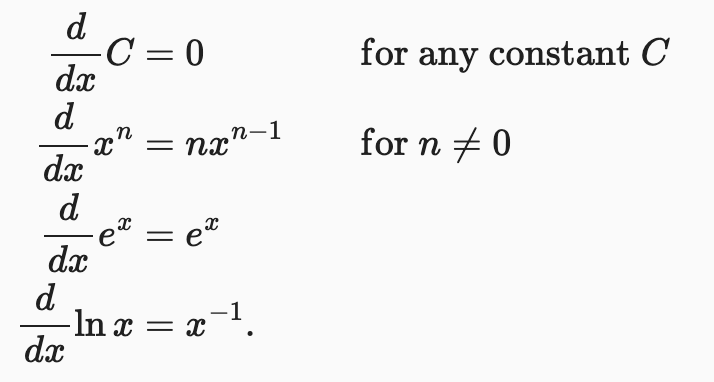

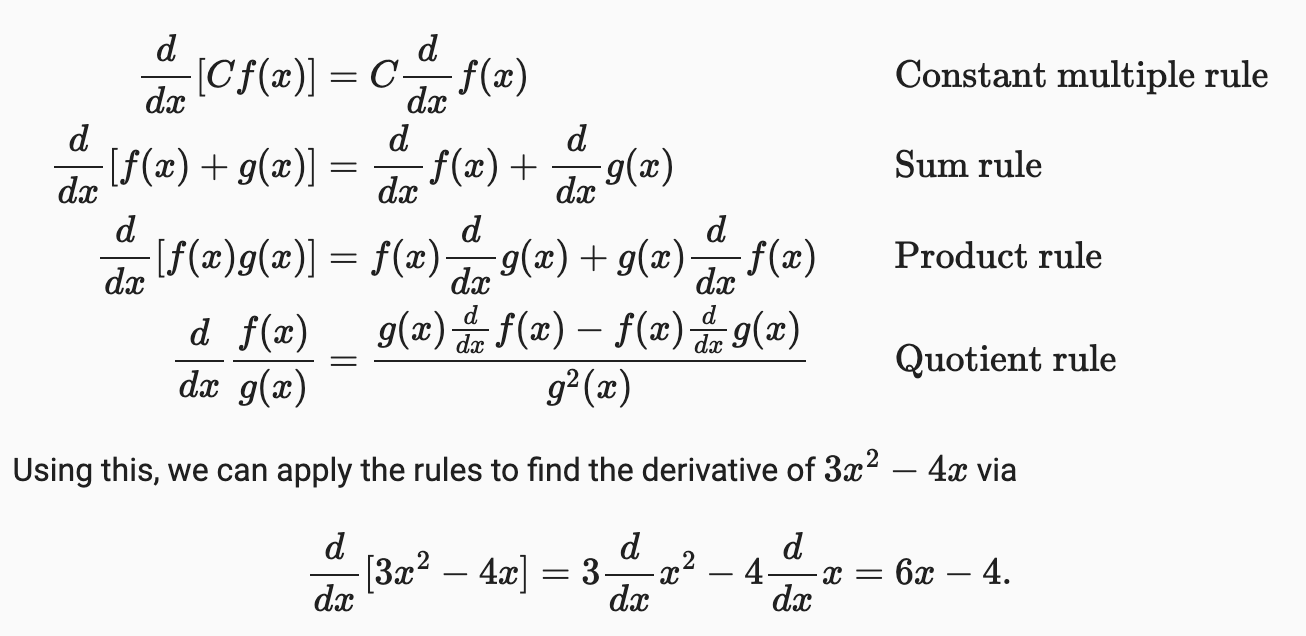

In [65]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')
# 6x - 4 | x=1 = 2 

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


# Visualization Utilities

In [66]:
# use_svg_display tells matplotlib to output graphics in SVG format for crisper images.
# The comment #@save is a special modifier that allows us to save any function, class, or other code block to the d2l package so that we can invoke it later without repeating the code, e.g., via d2l.use_svg_display().
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

In [67]:
# Conveniently, we can set figure sizes with set_figsize. 
# Since the import statement from matplotlib import pyplot as plt was marked via #@save in the d2l package, we can call d2l.plt.
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [68]:
# The set_axes function can associate axes with properties, including labels, ranges, and scales.
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [69]:
# With these three functions, we can define a plot function to overlay multiple curves. 
# Much of the code here is just ensuring that the sizes and shapes of inputs match.

#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

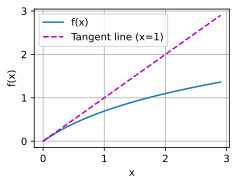

In [70]:
def f(x):
    return 3 * x ** 2 - 4 * x
def g(x):
    return np.log(1+x)

x = np.arange(0, 3, 0.1)
plot(x, [g(x), x], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

# Partial Derivatives and Gradients
- Let $y = f(x_1. x_2, ..., x_n) $ be a function of n variables
- the partial derviative of y with respect to its ith parameter is
- # $\frac{\partial y}{\partial x_i} = lim _ {h \rightarrow 0 } \frac{ f (x_1, ..., x_{i-1}, x_i +h, x_{i+1}, ..., x_n ) - f (x_1, ..., x_i, ..., x_n ) }{h}$
- # $ \frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = \partial _ {x_i} f = \partial _ i f = f _{x_i}  = f _ i = D_i f = D_{x_i} f $

# Gradient = vector of partial derivatives 
- # $\nabla _{\textbf{x}} f(\textbf{x}) = [\partial _{x_1} f(\textbf{x}), \partial _{x_2} f(\textbf{x}), ..., \partial _{x_n} f(\textbf{x}) ] ^ T$

# Single variable Chain Rule
- Let $y = f(u)$ and $u = g(x)$. equivalently, $y = f(g(x))$
- # $\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}$

# Multivariate Chain Rule
- # let $y = f(\textbf{u})$ where $\textbf{u} = [u_1, u_2, ..., u_m]^T$
- # $u_i = g_i (\textbf{x})$ where $\textbf{x} = [x_1, x_2, ..., x_n]^T$ i.e.  $\textbf{u} = g(\textbf{x})$
- # then chain rule states
# $\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial u_1} \frac{\partial u_1}{\partial x_i} + \frac{\partial y}{\partial u_2} \frac{\partial u_2}{\partial x_i} + ... + \frac{\partial y}{\partial u_m} \frac{\partial u_m}{\partial x_i}$ and so $\nabla _{\textbf{x}} y = \textbf{A} \nabla _{\textbf{u}} y $
- # $\textbf{A} \in \mathbb{R}^{n \times m}$ is a matrix that contains the derivative of vector $\textbf{u}$ with respect to vector $\textbf{x}$. Also called jacobian. 

# Automatic Differentiation

In [71]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [72]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

In [73]:
# simple function 2x**2
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [74]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [75]:
x.grad == 4 * x

tensor([True, True, True, True])

In [76]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

# Backward for Non-Scalar Variables
When y is a vector, the most natural representation of the derivative of y with respect to a vector x is a matrix called the Jacobian that contains the partial derivatives of each component of y with respect to each component of x. Likewise, for higher-order y and x, the result of differentiation could be an even higher-order tensor.

In [77]:
# https://zhang-yang.medium.com/the-gradient-argument-in-pytorchs-backward-function-explained-by-examples-68f266950c29
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

# Detaching Computation [optional]

Sometimes, we wish to move some calculations outside of the recorded computational graph. For example, say that we use the input to create some auxiliary intermediate terms for which we do not want to compute a gradient. In this case, we need to detach the respective computational graph from the final result. The following toy example makes this clearer: suppose we have z = x * y and y = x * x but we want to focus on the direct influence of x on z rather than the influence conveyed via y. In this case, we can create a new variable u that takes the same value as y but whose provenance (how it was created) has been wiped out. Thus u has no ancestors in the graph and gradients do not flow through u to x. For example, taking the gradient of z = x * u will yield the result u, (not 3 * x * x as you might have expected since z = x * x * x).

In [78]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

#  Gradients and Python Control Flow

In [79]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [80]:
a = torch.randn(size=(), requires_grad=True)
print(a)
d = f(a)
d.backward()

tensor(0.9314, requires_grad=True)


In [81]:
a.grad == d / a

tensor(True)

In [82]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

In [83]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [43, 57]


In [84]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([37., 63.])

In [85]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.5400, 0.4600])

In [86]:
counts = Multinomial(10000, fair_probs).sample()
counts / 10000

tensor([0.4940, 0.5060])

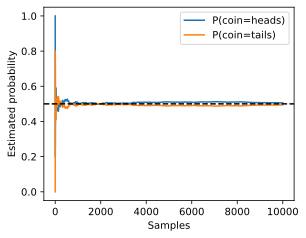

In [87]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();